# Razmerji med dominantnimi števili
##### Projekt pri predmetu Finančni praktikum
##### Avtorja: Žan Kramar, Brigita Milanič
##### Mentorja: Riste Škrekovski, Janoš Vidali

## Osnovni pojmi
**Graf G** je množica točk v prostoru in povezav med temi točkami. Označimo ga z $G=(V, E)$, kjer je $V(G)$ množica točk in $E(G)$ množica povezav grafa $G$.

**Odprta okolica ali soseščina N** vozlišča $v$ je množica vozlišč, ki je sosednja vozlišču $v$, torej $N(v) =\{ u\in V: uv\in E \}$. **Kartezični produkt grafov** $G_1 = (V_1, E_1)$ in $G_2 = (V_2, E_2)$ je graf $G = G_1 \square G_2$, ki ima množico točk $ V(G) = V_1 \times V_2$ in množico povezav $ E(G)$, kjer je $(u,v)(x,y) \in E(G)$, če je $ u=x $ in $vy \in E(G_2) $ ali $ux \in E(G_1)$ in $v = y$.

**Dominantna množica $ D \subseteq V(G) $ grafa $G$** je takšna množica, da ima vsako vozlišče grafa, ki ni v $D$ $( v \in V(G) \setminus D)$, soseda v $D$. Z drugimi besedami, vsako vozlišče  $v \in V(G)$ je ali  element množice $D$ ali pa je sosednje kakemu vozlišču, ki pripada množici $D$.
**Dominantno število** $\gamma(G) $  je moč najmanjše dominantne množice grafa $G$.

Množica $S$ je **totalno dominantna**, če je $ N(S) = V(G)$, kar pomeni, da je vsako vozlišče iz $ V(G)$ sosednje vozlišču iz množice $S$.
$ \gamma_t $ označujemo **totalno dominantno število**, ki predstavlja velikost najmanjše totalno dominantne množice.

Naj bo $G=(V, E)$ graf in $f: V \to P (\{1,2\dots,k\})$ funkcija, ki vsakemu vozlišču iz $V$ priredi množico barv iz $ \{1,2\dots,k\}$. Če za vsak $v \in V$ za katerega je $ f(v) = \emptyset $ velja $ \bigcup_{u \in N(v) } f(u) = \{1,2\dots,k\}$ potem f imenujemo **k-mavrična dominantna funkcija** grafa $G$, krajše kRDF funkcija. **Težo $w(f)$** funkcije f, definiramo z $w(f) = \sum_{v \in V} \mid f(v)\mid$. Najmanjša vrednost teže mavrične dominantne funkcije grafa $G$ se imenuje **k-mavrično dominanto število**, in jo označimo z $\gamma_{rk} (G)$.

Za graf $G$ je **k-mavrično totalno dominantna funkcija** f, krajše kRTDF,  k-mavrična dominantna funkcija s pogojem, da podgraf grafa G, ki ga določa množica $\{v \in V(G) \mid f(v) \neq \emptyset \}$ nima izoliranih vozlišč. Teža funkcije kRTDF je  $w(f) = \sum_{v \in V} \mid f(v)\mid$. Za dan graf G, imenujemo težo najmanjše kRTDF funkcije **k-mavrično totalno dominantno število**, in jo označimo z  $\gamma_{rkt} (G)$. 

## Problema
#### 1.Problem
Najdi funkcijo $b(k)$, da za $k \geqq 3$, za katero je dana neenakost ozka:
\begin{equation}
  \gamma_{krt}(G) \geqq b(k) \cdot \gamma_t
\end{equation}

Z drugimi besedami, najdi $b(k) = \inf_G \frac{\gamma_{krt}(G)}{\gamma_t(G)}$.

#### 2. Problem
Najdi funkcijo $a(k)$, da za $k \geqq 3$, za katero je dana neenakost ozka:
\begin{equation}
   a(k)\cdot\gamma_{kr}(G)\geqq\gamma_{krt}(G)
\end{equation}


Z drugimi besedami, najdi $a(k) = \sup_G \frac{\gamma_{krt}(G)}{\gamma_{kr}(G)}$.


## Reševanje naloge

Najprej sva podrobneje analizirala grafe do vključno 8 vozlišč in poskusila najti vzorce. Tu še nisva uporabila simmulated anneling metode, ker sva enostavno preverila vse grafe in si zabeležila ustrezne vrednosti funkcij $a(k)$ in $b(k)$ za posamičen $k$ od 3 do 8.
Najprej sva definirala *funkcijo dominacija*, ki nam je izračuna za željeno število k in graf totalno dominacijo, k-mavrično število in totalno k-mavrično dominacijo. Funkcijo sva nato uporabila v *funkciji razmerje*, ki nam izračuna infiumum oz. supremum. Funkcija razmerje sprejme parameter v, s katerim določimo število vozlišč grafa. Izračuna nam kvocient med dominacijami za vsak graf velikosti v in za vsako število k med 3 in številom vozlišč.
Rezultate sva s pomočjo *funkcije shrani* shranila v datoteko *grafi.txt*. Ta nama je tudi olajšala delo, da nisva funkcije razmerje za vsako število vozlišč posebej poganjala, saj ji povemo interval števil za katere naj pokliče funkcijo razmerje. Poleg tega si shrani tudi grafe za katere je dosežen infimum oz. supremum. Če želimo, da se nam izriše graf z v vozlišči in k-mavričnim številom pri katerem je dosežen supremum/ infimum pokličemo *funkcijo graf_sup* oz. *funkcijo graf_inf*.

In [1]:
import json

def dominacija(G,k):
    t = G.dominating_set(value_only= True, total = True)
    kr = (G.cartesian_product(graphs.CompleteGraph(k))).dominating_set(value_only=True)
    krt = (G.cartesian_product(graphs.CompleteGraph(k))).dominating_set(value_only=True, total=True)
    return [t,kr,krt]

def razmerje(v):
    sez_inf = []
    sez_sup = []
    grafi_inf = []
    grafi_sup = []
    for i in range(2,v+1):
        b = 11111111
        a= 0
        sez_inf.append([i,b])
        sez_sup.append([i,a])
        grafi_inf.append([0])
        grafi_sup.append([0])
        for G in graphs(v):
            if G.is_connected():
                dom = dominacija(G,i)
                if b > dom[2]/dom[0]:
                    b = dom[2]/dom[0]
                    sez_inf[i-2] = [i,a]
                    grafi_inf[i-2] = G.sparse6_string()
                if a < dom[2]/dom[1]:
                    a = dom[2]/dom[1]
                    sez_sup[i-2] = [i,b]
                    grafi_sup[i-2]=G.sparse6_string()

    return [sez_inf,sez_sup],grafi_inf, grafi_sup

def shrani(i,j):
    o= open('grafi.txt','w')
    for t in range(i,j):
        r,graf_i,graf_s = razmerje(t)
        o.write(str(r))
        o.write('\n')
        with open('grafi_inf{}.json'.format(t),'w') as i :
            json.dump(graf_i,i)
        with open('grafi_sup{}.json'.format(t),'w')as s:
            json.dump(graf_s,s)
    o.close()
    
def graf_sup(v,k):
    with open("grafi_sup{}.json".format(v)) as i:
        graf_sup = json.load(i)
        G = Graph(str(graf_sup[k-2]))
    return G

def graf_inf(v,k):
    with open("grafi_inf{}.json".format(v)) as i:
        graf_inf = json.load(i)
        H = Graph(str(graf_inf[k-2]))
    return H

št. vozlišč|b_3 |b_4 |b_5 |b_6 |b_7 |b_8
-----------|----|----|----|----|----|---
3          |3/2 |3/2 | 3/2| 3/2| 3/2| 3/2
4          |3/2 | 2  | 2  | 2  | 2  | 2
5          |4/3 | 5/3| 5/3| 5/3| 5/3| 5/3
6          | 5/4| 3/2| 3/2| 3/2| 3/2| 3/2
7          | 5/4| 3/2| 7/4| 7/4| 7/4| 7/4
8          |5/4 | 3/2| 8/5| 8/5| 8/5| 8/5


št. vozlišč|a_3 |a_4 |a_5 |a_6 |a_7 |a_8|
-----------|----|----|----|----|----|---|
3          | 1  |   1|   1|   1|   1| 1
4          | 4/3|   1|   1|   1|   1| 1
5          | 4/3|   1|   1|   1|   1| 1
6          | 5/3| 3/2| 6/5|   1|   1| 1
7          | 5/3| 3/2| 6/5|   1|   1| 1
8          | 5/3| 7/4| 7/5| 4/3| 8/7| 1


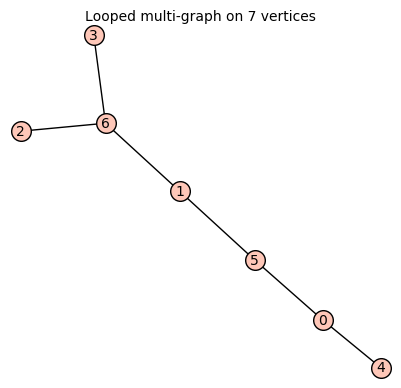

In [2]:
graf_inf(7,5)

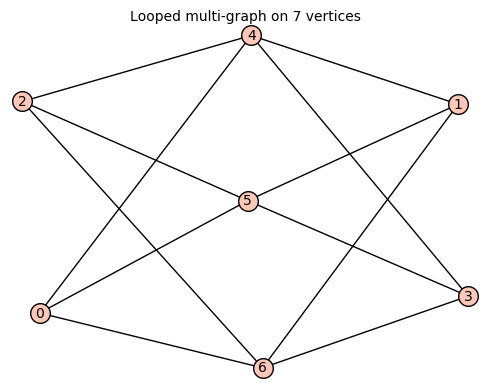

In [3]:
graf_sup(7,3)

Tako imamo zdaj v datoteki grafi.txt shranjene minimume in maksimume kvocientov dominacij. Pri iskanju infimuma vidimo, da če se omejimo na posamezno velikost grafa in povečujemo k, da z naraščanjem k tudi infimum na začetku narašča, a se čez čas ne spreminja več.
Če pa fiksiramo k in povečujemo velikost grafa pa iz podatkov ni razvidnih vzorcev.
Pri drugem problemu, če fiksiramo vozlišča in povečujemo k supremum pada in doseže 1, ko je k enak številu vozlišč grafa. Če pa je k fiksen in povečujemo vozlišča supremum narašča proti 2.
Sumimo, da se bo supremum nahajal na intervalu [3/2,2].

Za večje grafe sva v kodo dodala metodo simmulated anneling, ki v principu deluje podobno kot gradientna medtoda iskanja maksimuma funkcije, a dopusti moznost da smo se zaradi začetnega približka ujeli v nek lokali maksimum in občasno za naslendji graf vzame "slabši" graf in nadaljuje. Seveda sva tu morala definirati funkcijo sosed(G), ki z dodajanjem ali odstranjevanjem vozlišč ali povezav ustvari soseda od grafa G, ki je podoben G in ga lahko uporabimo kot naslednjega kandidata.

In [8]:
import random
import json

def sosed(h, k=1):
    for i in range(k):
        g = Graph(h)
        while True:
            c =random.random()
            print c
            if c <=0.25:
                b = len(g.vertices())
                a = randrange(0,b)
                g.add_vertex(name = b)
                g.add_edge(a,b)
                h = g
                break
            elif c <= 0.5 and c > 0.25:
                a = g.complement().random_edge()
                g.add_edge(a)
                h = g
                break
            elif c > 0.75:
                a = g.random_edge()
                g.delete_edge(a)
                if g.is_connected():
                    h = g
                    break
                else:
                    g.add_edge(a)
                    continue
            else:
                a = g.random_vertex()
                g.delete_vertex(a)
                if g.is_connected():
                    h = g
                    break
                else:
                    g.add_vertex(a)
                    continue
    return h

def kriterij_a(g, i):
    return (g.cartesian_product(graphs.CompleteGraph(i))).dominating_set(value_only = True, total = True)/RR((g.cartesian_product(graphs.CompleteGraph(i))).dominating_set(value_only = True))

def kriterij_b(g,i):
    return (g.cartesian_product(graphs.CompleteGraph(i))).dominating_set(value_only = True, total = True)/RR(g.dominating_set(value_only=True, total = True))

def sim_ann_a(n, p, k, ponovitve, i=1):
    g = graphs.RandomGNP(n,p)
    najbolsi = g
    vrednost = 0
    nek = RR(kriterij_a(g,k))
    for m in range(ponovitve):
        t = ponovitve/(m+1)
        sos = sosed(g, i)
        razlika =RR(kriterij_a(sos,k)) -nek
        print m
        if razlika > 0:
            najbolsi = sos
            g = sos
            nek = nek + razlika
            vrednost = nek
        elif exp((razlika * 100)/t) > random.random():
            g = sos
            nek = RR(kriterij_a(g,k))
    return najbolsi.sparse6_string(), float(vrednost)

def sim_ann_b(n, p, k, ponovitve, i=1):
    g = graphs.RandomGNP(n,p)
    najbolsi = g
    vrednost = 0
    nek = RR(kriterij_b(g,k))
    for m in range(ponovitve):
        t = ponovitve/(m+1)
        sos = sosed(g)
        razlika = nek - RR(kriterij_b(sos,k))
        print m
        if razlika > 0:
            g = sos
            najbolsi = sos
            nek = nek - razlika
            vrednost = nek
        elif exp((razlika * 100)/t) > random.random():
            g = sos
            nek = RR(kriterij_b(g,k))
    return najbolsi.sparse6_string(), float(vrednost)


def test_seznam(n, p, sez, ponovitve, i=1):
    podatki = []
    for k in sez:
        graf_a, stevilo_a = sim_ann_a(n,p, k, ponovitve)
        graf_b, stevilo_b = sim_ann_b(n,p, k, ponovitve)
        podatki.append([graf_a, stevilo_a, graf_b, stevilo_b])
    	return podatki


def zapisi(podatki, i):
    with open("rezultati{}.json".format(i), "w") as f:
        json.dump(podatki, f)

Z uporabo te funkcije sva prišla do željenih rezultatov tudi na grafih z večjim številom vozlišč, kjer testiranje vsakega možnega grafa nebi bilo smiselno, saj bi trajalo predolgo.
Glede na rezultate bi za funkcijo a(k) predlagala funkcijo -0.09* k + 1.8.
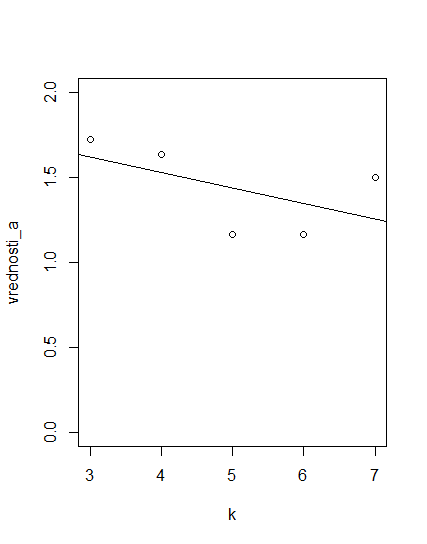

Za funkcijo b(k) pa sva na podanih rezultatih uporabila linearno aproksimacijo, in dobila funkcijo b(k) = 0.18 * k + 0.99. Za izračun je bila uporabljena vgrajena funkcija v RStudiu lm.


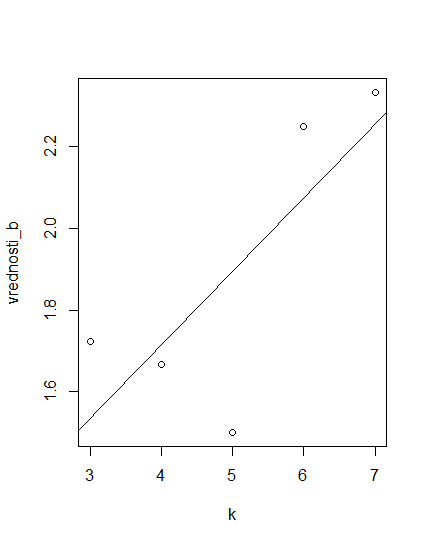

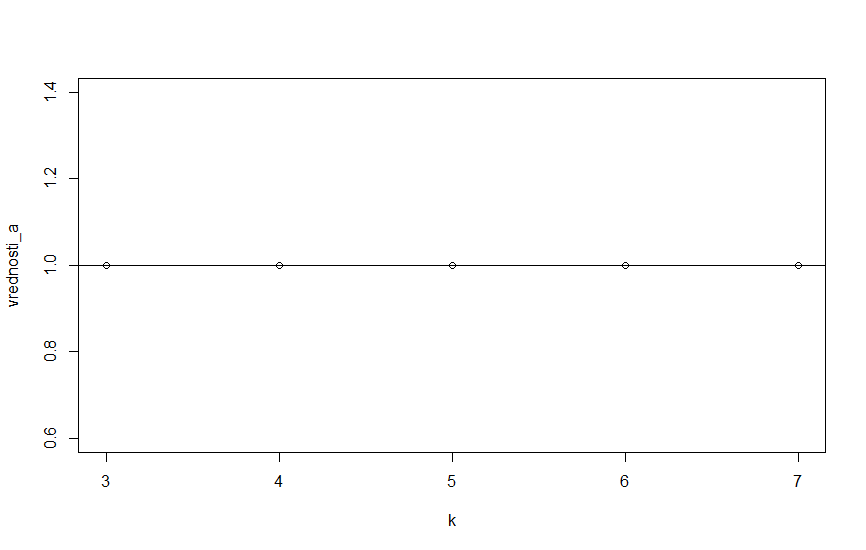
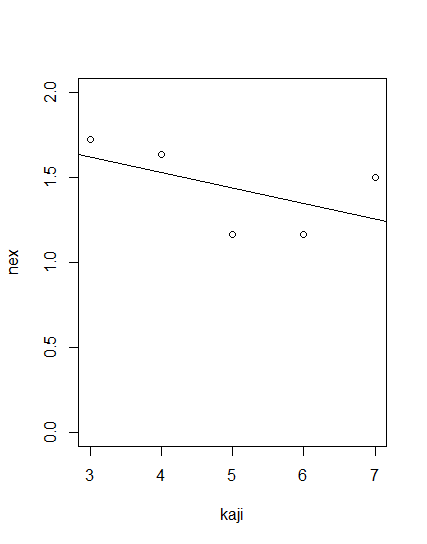
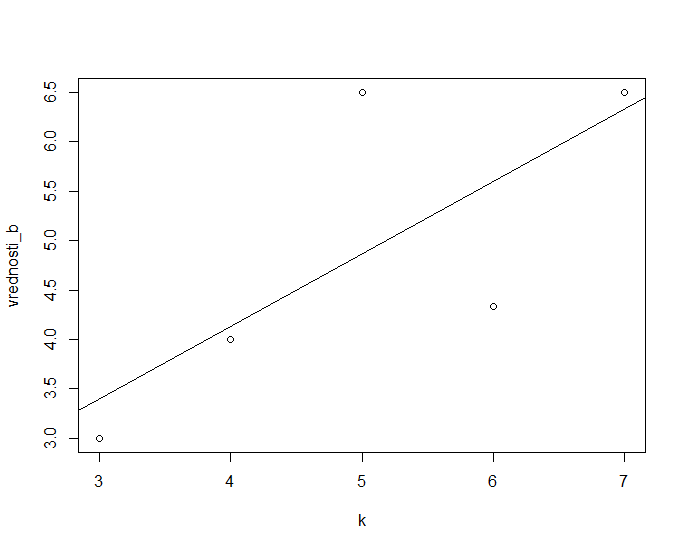

k|b_{k}| a_{k}
-|-----|------
3|1.25 |1.722
4|1.667|1.286
5|1.5  |1.167
6|2.25 |1.667
7|2.33 |1.5

Tu je premer grafa za k= 5, v katerem je bil dosežen supremum, uporabljen za določanje funkcije $a$.

In [38]:
with open("rezultat7.json") as i:
        graf= json.load(i)
        H = Graph(str(graf[0][2]))
        G = Graph(str(graf[0][0]))
with open("rezultat6.json") as i:
        graf= json.load(i)
        J = Graph(str(graf[0][2]))
        C = Graph(str(graf[0][0]))
        
with open("rezultat5.json") as i:
        graf= json.load(i)
        K = Graph(str(graf[0][2]))
        L = Graph(str(graf[0][0]))


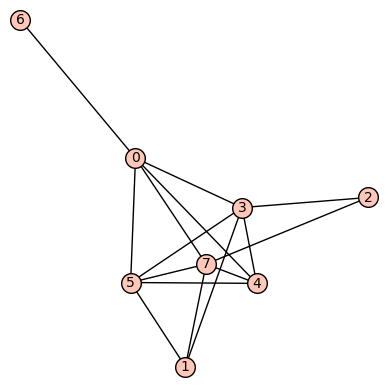

In [32]:
show(L)

In še dva primera grafov, v katerih je bil dosežen infimum za k=5 in k=4, uporabljen za določanje funkcije $b$:

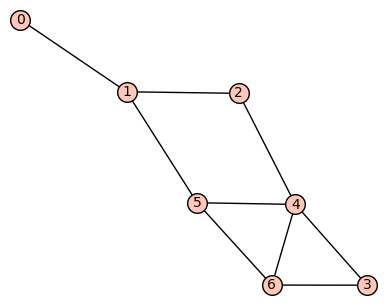

In [30]:
show(H)

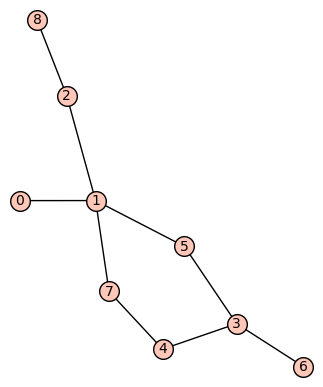

In [28]:
show(J)